In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt 

# EULER'S METHOD vs HEUN'S METHOD FOR SOLVING SYSTEMS OF LINEAR EQUATIONS

We have the simple equation:

$ \frac{d\mathbf{S}}{dt}=\mathbf{H}\times\mathbf{S}$,

where $\mathbf{H}=\left(H_{x},H_{y},H_{z}\right)$ represents an external magnetic field which we suppose constant, and $\mathbf{S}=\left(S_{x},S_{y},S_{z}\right)$. The explicit form is:

$
\left(\begin{array}{c}
\frac{dS_{x}}{dt}\\
\frac{dS_{y}}{dt}\\
\frac{dS_{z}}{dt}
\end{array}\right)	=\left(\begin{array}{c}
H_{y}S_{z}\left(t\right)-H_{z}S_{y}\left(t\right)\\
-H_{x}S_{z}\left(t\right)+H_{z}S_{x}\left(t\right)\\
H_{x}S_{y}\left(t\right)-H_{y}S_{x}\left(t\right)
\end{array}\right).$

Now, we discretize the time variable $t_{N}$ in N discreet steps (i.e time is discretized in 
$t_{0},t_{1},t_{2},\dots,t_{N}$ values following the rule $ t_{n}	= t_{0}+\Delta t.n$),

so the time follows:

$t_{0}	=t_{0}$,

$t_{1}	=t_{0}+\Delta t$

$\vdots$

$t_{N}	=t_{0}+\Delta t.N$.

Applying Euler's Method:

$\left(\begin{array}{c}
S_{x}\left(t_{n+1}\right)-S_{x}\left(t_{n}\right)\\
S_{y}\left(t_{n+1}\right)-S_{y}\left(t_{n}\right)\\
S_{z}\left(t_{n+1}\right)-S_{z}\left(t_{n}\right)
\end{array}\right)	=\left(\begin{array}{c}
H_{y}S_{z}\left(t_{n}\right)-H_{z}S_{y}\left(t_{n}\right)\\
-H_{x}S_{z}\left(t_{n}\right)+H_{z}S_{x}\left(t_{n}\right)\\
H_{x}S_{y}\left(t_{n}\right)-H_{y}S_{x}\left(t_{n}\right)
\end{array}\right)\Delta t$,

and reordering:

$\left(\begin{array}{c}
S_{x}\left(t_{n+1}\right)\\
S_{y}\left(t_{n+1}\right)\\
S_{z}\left(t_{n+1}\right)
\end{array}\right)	=\left(\begin{array}{c}
H_{y}S_{z}\left(t_{n}\right)-H_{z}S_{y}\left(t_{n}\right)\\
-H_{x}S_{z}\left(t_{n}\right)+H_{z}S_{x}\left(t_{n}\right)\\
H_{x}S_{y}\left(t_{n}\right)-H_{y}S_{x}\left(t_{n}\right)
\end{array}\right)\Delta t+\left(\begin{array}{c}
S_{x}\left(t_{n}\right)\\
S_{y}\left(t_{n}\right)\\
S_{z}\left(t_{n}\right)
\end{array}\right)$.

We have to solve a system of three coupled linear equations. 

cantidad de pasos: 100
tiempo final: 20


Text(0.5, 1.0, 'Error de método de Euler')

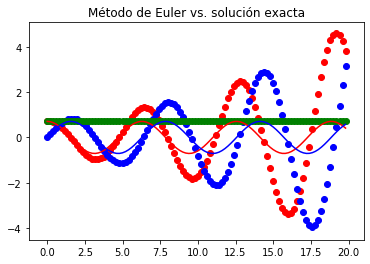

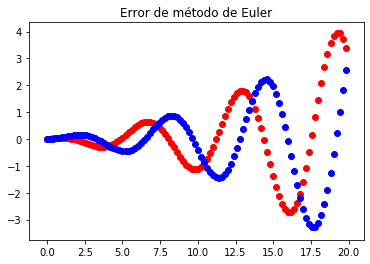

In [14]:
#VALOR INICIAL DEL CAMPO
H=np.array([0,0,1]) 

#FUNCIÓN
def funcion(S,t):
    resultado=np.cross(H,S)
    return resultado

#CONDICIONES INICIALES Y DEFINICIÓN DEL VECTOR S

N=int(input("cantidad de pasos: "))
tN=float(input("tiempo final: "))
t0=0
dt=(tN-t0)/N

t=np.zeros(N)
Theta=(np.pi)/4
S_e=np.zeros(shape=(N,3))
S_e[0]=(np.sin(Theta),0,np.cos(Theta))

#VERIFICACIÓN DEL PRODUCTO VECTORIAL FUNCIONA
# print("El vector spin inicial S es: ", S)
# R=funcion(S,t)
# print("El producto vectorial entre H y S inicial es: ", R)

#EVOLUCION TEMPORAL
for i in np.arange(1,N):
    t[i] = t[i-1] + dt
    S_e[i] = S_e[i-1] + dt * (funcion(S_e[i-1],t[i-1]))
    #print (t[i],S_e[i])
    
fig, ax = plt.subplots()
ax.scatter(t, S_e[:,0], color='red')
ax.scatter(t, S_e[:,1], color='blue')
ax.scatter(t, S_e[:,2], color='green')
ax.plot(t,np.cos(t)*np.sin(Theta), color='red')
ax.plot(t,np.sin(t)*np.sin(Theta), color='blue')
ax.set_title('Método de Euler vs. solución exacta')

fig, ax = plt.subplots()
ax.scatter(t, S_e[:,0]-np.cos(t)*np.sin(Theta), color='red')
ax.scatter(t, S_e[:,1]-np.sin(t)*np.sin(Theta), color='blue')
ax.set_title('Error de método de Euler')


cantidad de pasos: 100
tiempo final: 20


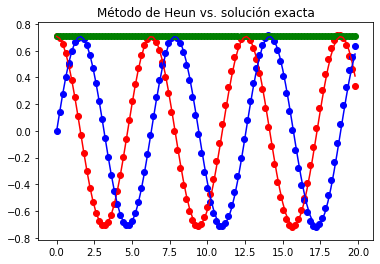

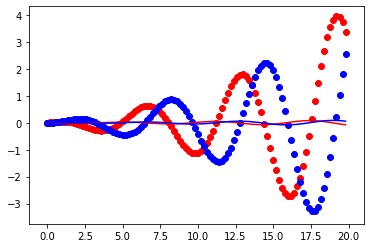

In [19]:
#MÉTODO DE HEUN

H = np.array([0,0,1]) # CAMPO en alguna dirección en particular e.g en la dirección z
P = np.array([[0, -H[2], H[1]],
              [H[2], 0, -H[0]],
              [-H[1], H[0],0]])
#print(p)

def funcion(S):
    return np.dot(P,S)
  
N=int(input("cantidad de pasos: "))
tN=float(input("tiempo final: "))
t0=0
dt=(tN-t0)/N

t=np.zeros(N)
Theta=(np.pi)/4
S=np.zeros(shape=(N,3))
S[0]=(np.sin(Theta),0,np.cos(Theta))

#evolución temporal
for i in np.arange(1,N):
    t[i]=t[i-1]+dt
    S_intermedio = S[i-1] + (dt) * (funcion(S[i-1]))
    S[i] = S[i-1] + (dt/2) * (funcion (S[i-1]) + funcion(S_intermedio))
    #print(t[i],S[i])
    
#gráfico Heun vs exacta

fig1, ax = plt.subplots()
ax.scatter(t, S[:,0], color='red')
ax.scatter(t, S[:,1], color='blue')
ax.scatter(t, S[:,2], color='green')
ax.plot(t,np.cos(t)*np.sin(Theta), color='red')
ax.plot(t,np.sin(t)*np.sin(Theta), color='blue')
ax.set_title('Método de Heun vs. solución exacta')

fig2, ax = plt.subplots()
ax.plot(t,S[:,0]-np.cos(t)*np.sin(Theta), color='red')
ax.plot(t,S[:,1]-np.sin(t)*np.sin(Theta), color='blue')
ax.scatter(t, S_e[:,0]-np.cos(t)*np.sin(Theta), color='red')
ax.scatter(t, S_e[:,1]-np.sin(t)*np.sin(Theta), color='blue')

As we can confirm, Euler's method is not as correct as Heun's method, because it does not preserve the spin norm as time goes by. The way of correcting this in Euler's method, could be trying to take very small intervals of time, though it can make the calculus less efective. In each graph we compare the exact solution vs the corresponding method. We observe Heun's method fits the solution in a much better way (point vs. solid line). 

In the last plot we observe the difference between both methods and the exact solution: the amplitude starts to diverge in Euler's case, meanwhile in Heun's method the diverge is much smaller (one order of magnitude).


References:

<ol>
  <em><li>Scherer, Philipp. Computational Physics, Simulation of Classical and Quantum Systems. Third Edition 2017. Springer
    </em>
</ol>